In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Credit Card Fraud Detection Dataset 2023/creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [8]:
print(df.shape)
print(df.info)

(568630, 31)
<bound method DataFrame.info of             id        V1        V2        V3        V4        V5        V6  \
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7  

In [9]:
# drop transaction id
df.drop(columns=["id"], inplace=True)

Missing Value

In [10]:
missing_value = df.isnull().sum()
# print(missing_value)
print(missing_value[missing_value > 0])

Series([], dtype: int64)


Class Distribution

In [11]:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    284315
1    284315
Name: count, dtype: int64


<ipython-input-12-0e09269d593d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=['green','orange'])


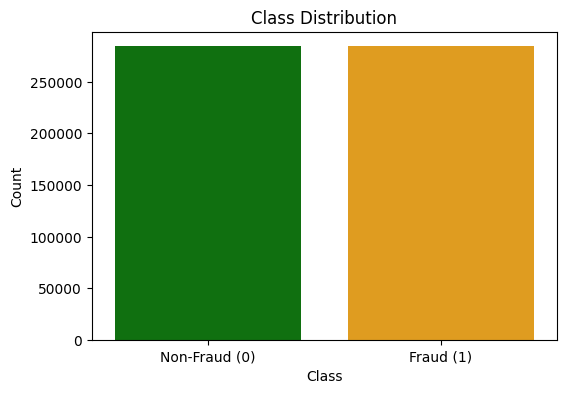

In [12]:
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['green','orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ["Non-Fraud (0)", "Fraud (1)"])
plt.title('Class Distribution')
plt.show()

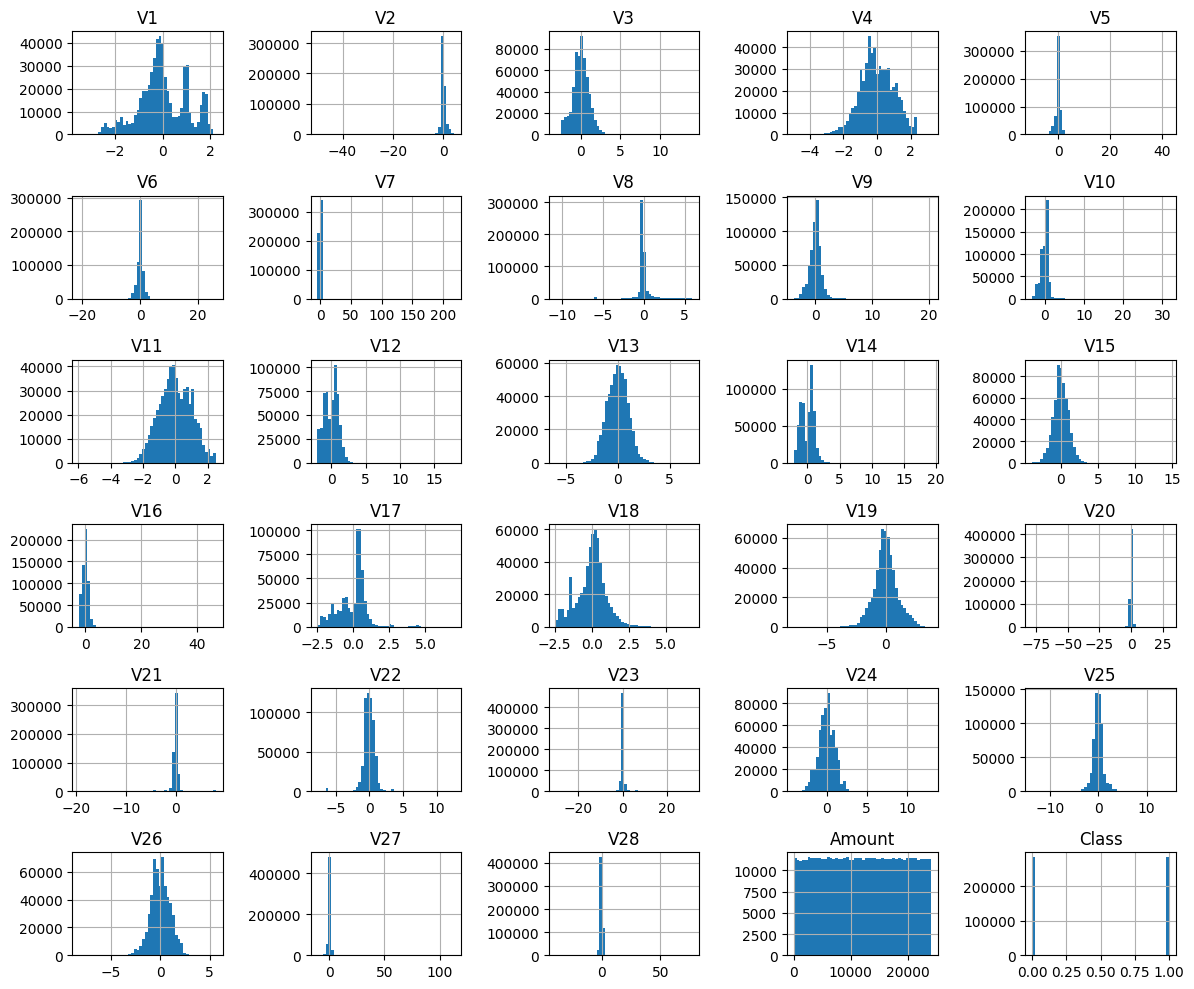

In [13]:
# df.describe()

df.hist(figsize=(12, 10), bins=50)

plt.tight_layout()
plt.rcParams.update({'font.size': 7})

plt.show()

Correlation Analysis

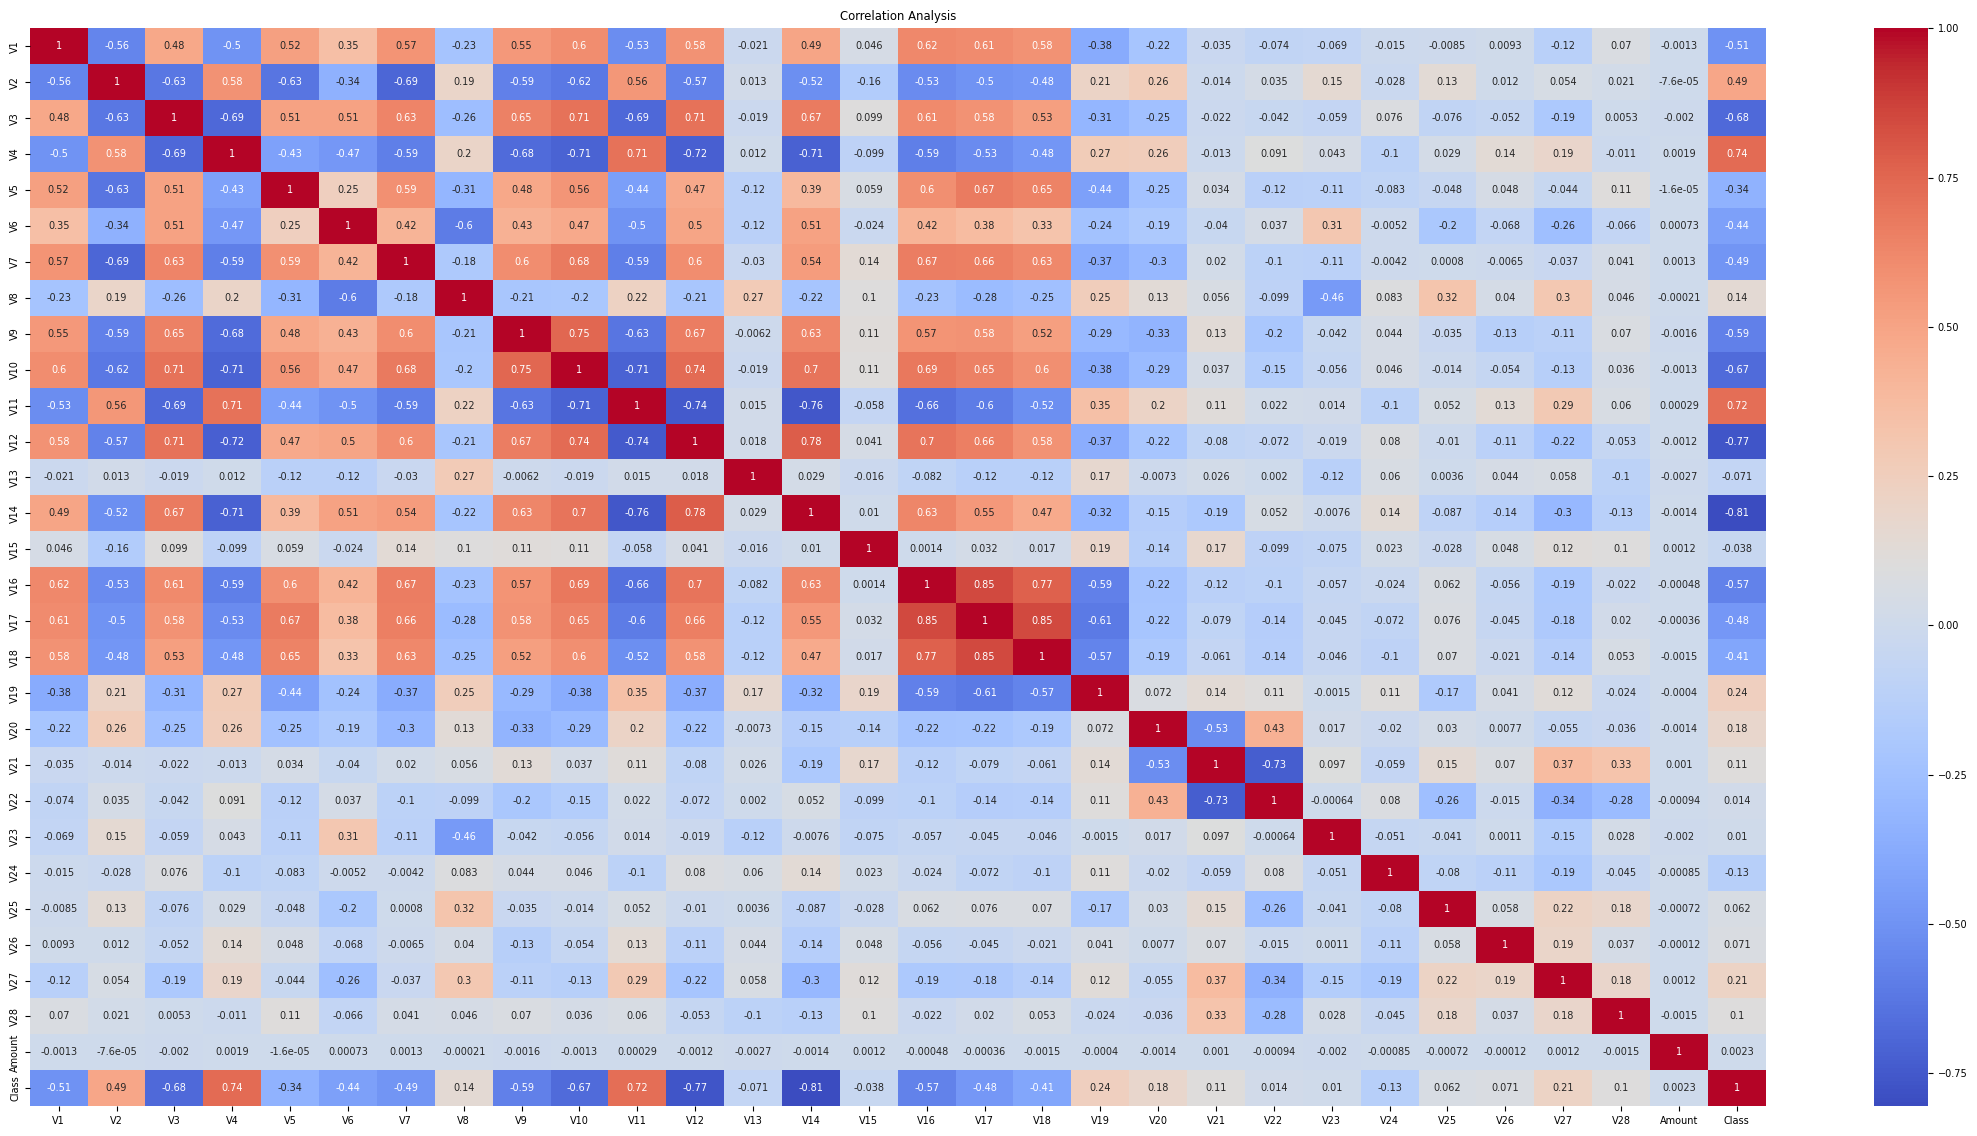

In [14]:
corr_matrix = df.corr()

plt.figure(figsize=(28, 14))
plt.title('Correlation Analysis')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<ipython-input-15-23879f7421da>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_corr_sorted.index, y=feature_corr_sorted.values, palette="viridis")


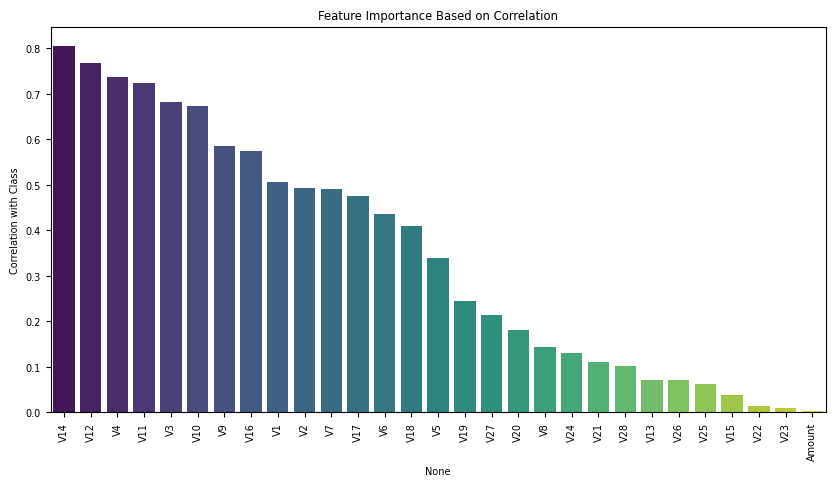

In [15]:
feature_corr = df.corr()["Class"].drop("Class")  # Remove self-correlation

# Sort by absolute correlation value
feature_corr_sorted = feature_corr.abs().sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_corr_sorted.index, y=feature_corr_sorted.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.ylabel("Correlation with Class")
plt.title("Feature Importance Based on Correlation")
plt.show()

Top Features

In [22]:
N = 14
top_features = feature_corr_sorted.index[:N].tolist()

print("Selected Features:", top_features)

Selected Features: ['V14', 'V12', 'V4', 'V11', 'V3', 'V10', 'V9', 'V16', 'V1', 'V2', 'V7', 'V17', 'V6', 'V18']


### **Training**

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [24]:
# define X and y
X = df[top_features]
y = df["Class"]

# train test split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (454904, 14), Test shape: (113726, 14)


In [25]:
modelA = LogisticRegression()
modelB = RandomForestClassifier()
modelC = XGBClassifier()

In [26]:
modelA.fit(X_train, y_train)
y_pred = modelA.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



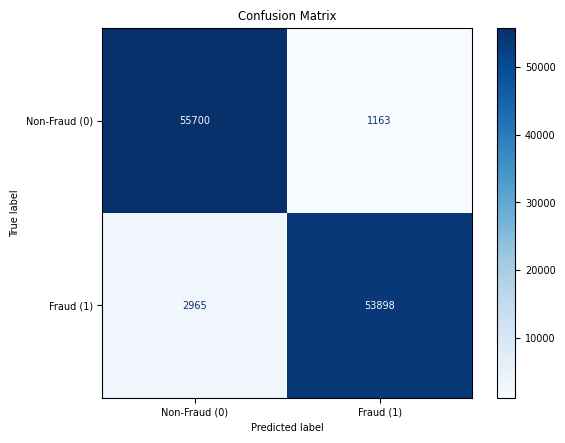

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud (0)", "Fraud (1)"])
disp.plot(cmap="Blues", values_format="d")  # 'd' ensures integer formatting
plt.title("Confusion Matrix")
plt.show()

In [27]:
modelB.fit(X_train, y_train)
y_pred = modelB.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



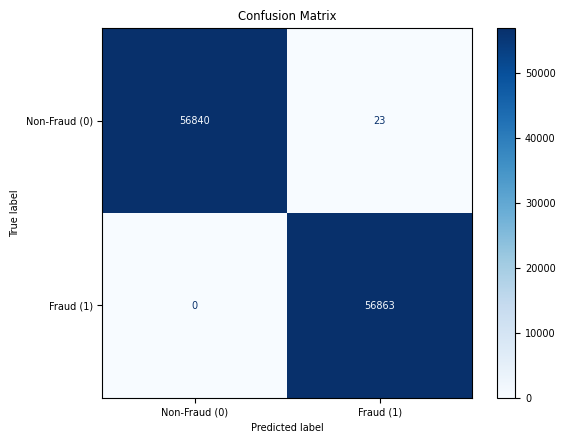

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud (0)", "Fraud (1)"])
disp.plot(cmap="Blues", values_format="d")  # 'd' ensures integer formatting
plt.title("Confusion Matrix")
plt.show()

In [31]:
modelC.fit(X_train, y_train)
y_pred = modelC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



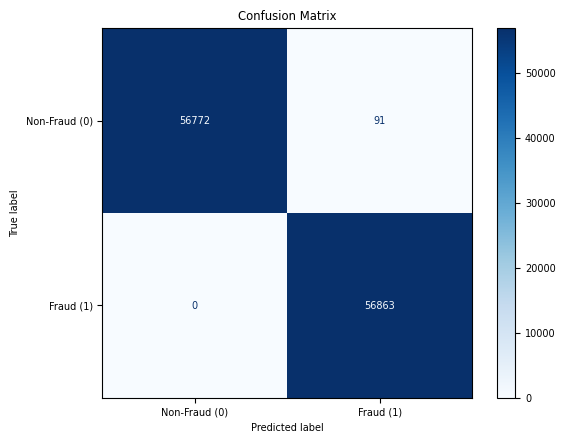

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud (0)", "Fraud (1)"])
disp.plot(cmap="Blues", values_format="d")  # 'd' ensures integer formatting
plt.title("Confusion Matrix")
plt.show()
